<a href="https://colab.research.google.com/github/kram254/Optimized-Machine-Learning-Based-Cyber-Attack-Detection-Model/blob/Latest-changes/cybersec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center><bold>Optimized Machine Learning-Based Cyber-Attack Detection Model for Enhanced Cybersecurity in Web-Based Systems</bold></center>**


**<bold> Optimized Machine Learning-Based Cyber-Attack Detection Model to bolster cybersecurity in web-based systems. The trip will be guided along the way of data preprocessing, exploratory analysis, and model selection and finally reach the design of powerful algorithms, which have the ability to detect and categorize cyber threats. Using the LSTM, RNN and DNN architectures, we are planning to significantly improve the detection of cyber-attack accuracy and efficiency in order to entrench the digital strongholds that shield sensitive internet data.
 </bold>**

**<center><bold>Milestone 1</bold></center>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_paths = [
    '/content/drive/MyDrive/data/Friday-WorkingHours-Afternoon.csv',
    '/content/drive/MyDrive/data/Friday-WorkingHours-Afternoon-P.csv',
    '/content/drive/MyDrive/data/Friday-WorkingHours-Morning.csv',
    '/content/drive/MyDrive/data/Monday-WorkingHours.csv',
    '/content/drive/MyDrive/data/Thursday-WorkingHours-Afternoon.csv',
    '/content/drive/MyDrive/data/Thursday-WorkingHours-Morning.csv',
    '/content/drive/MyDrive/data/Tuesday-WorkingHours.csv',
    '/content/drive/MyDrive/data/Wednesday-workingHours.csv',

]

dataframes = [pd.read_csv(f) for f in file_paths]
dataset = pd.concat(dataframes, ignore_index=True)

dataset1= pd.read_csv("/content/drive/MyDrive/data/Friday-WorkingHours-Afternoon.csv")

for i, dataset in enumerate(dataframes):
    print(f"Dataset {i+1} - Shape: {dataset.shape}")
    display(dataset.head())


Dataset 1 - Shape: (225745, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 2 - Shape: (286467, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 3 - Shape: (191033, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


Dataset 4 - Shape: (529918, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 5 - Shape: (288602, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


Dataset 6 - Shape: (170366, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


Dataset 7 - Shape: (445909, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 8 - Shape: (692703, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**<bold> Data Processing</bold>**

In [ ]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

for column in dataset.columns:
    if dataset[column].dtype == np.float64 or dataset[column].dtype == np.int64:
        dataset[column].fillna(dataset[column].mean(), inplace=True)


dataset = dataset.dropna()
dataset = dataset.drop_duplicates()
dataset.reset_index(drop=True, inplace=True)
info = dataset.info()
null_values = dataset.isnull().sum()

print("```````````````````````````````````````````````````````````")
print(null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610794 entries, 0 to 610793
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             610794 non-null  int64  
 1    Flow Duration                610794 non-null  int64  
 2    Total Fwd Packets            610794 non-null  int64  
 3    Total Backward Packets       610794 non-null  int64  
 4   Total Length of Fwd Packets   610794 non-null  int64  
 5    Total Length of Bwd Packets  610794 non-null  int64  
 6    Fwd Packet Length Max        610794 non-null  int64  
 7    Fwd Packet Length Min        610794 non-null  int64  
 8    Fwd Packet Length Mean       610794 non-null  float64
 9    Fwd Packet Length Std        610794 non-null  float64
 10  Bwd Packet Length Max         610794 non-null  int64  
 11   Bwd Packet Length Min        610794 non-null  int64  
 12   Bwd Packet Length Mean       610794 non-nul

In [ ]:
def reduce_mem_usage(df):
    """
    Iterating through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))




    return df


dataset = reduce_mem_usage(dataset)

# display(dataset.info())
display(dataset.describe())



Memory usage of dataframe is 368.14 MB
Memory usage after optimization is: 140.38 MB
Decreased by 61.9%


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,610794.000000,6.107940e+05,610794.000000,610794.000000,6.107940e+05,6.107940e+05,610794.000000,610794.000000,610794.000000,610794.000000,...,610794.000000,610794.000000,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,610794.0,6.107940e+05,6.107940e+05,6.107940e+05
mean,6432.111589,3.175187e+07,10.555035,11.543119,6.258788e+02,1.927276e+04,263.168694,15.398152,66.982224,93.933784,...,6.898530,26.326563,1.046150e+05,5.399295e+04,1.845596e+05,7.162068e+04,25075696.0,5.379891e+05,2.554127e+07,2.464759e+07
std,16603.314955,4.421601e+07,795.717376,1048.114271,6.560426e+03,2.386714e+06,636.116986,40.006374,162.724442,238.658630,...,761.595616,6.403308,7.453429e+05,5.046630e+05,1.163974e+06,6.439284e+05,39673476.0,4.776426e+06,4.002959e+07,3.965410e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.264000e+03,2.000000,1.000000,4.600000e+01,1.800000e+01,31.000000,0.000000,27.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,1.497000e+05,3.000000,2.000000,1.000000e+02,2.500000e+02,52.000000,0.000000,43.750000,3.464102,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.493914e+07,7.000000,6.000000,3.750000e+02,1.159500e+04,351.000000,34.000000,60.285713,134.933319,...,2.000000,32.000000,1.016000e+03,0.000000e+00,1.016000e+03,1.010000e+03,58600000.0,0.000000e+00,5.957500e+07,5.840000e+07
max,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757812,6429.190918,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,120000000.0,7.690000e+07,1.200000e+08,1.200000e+08


**<bold>Exploratory Data Analysis (EDA)</bold>**

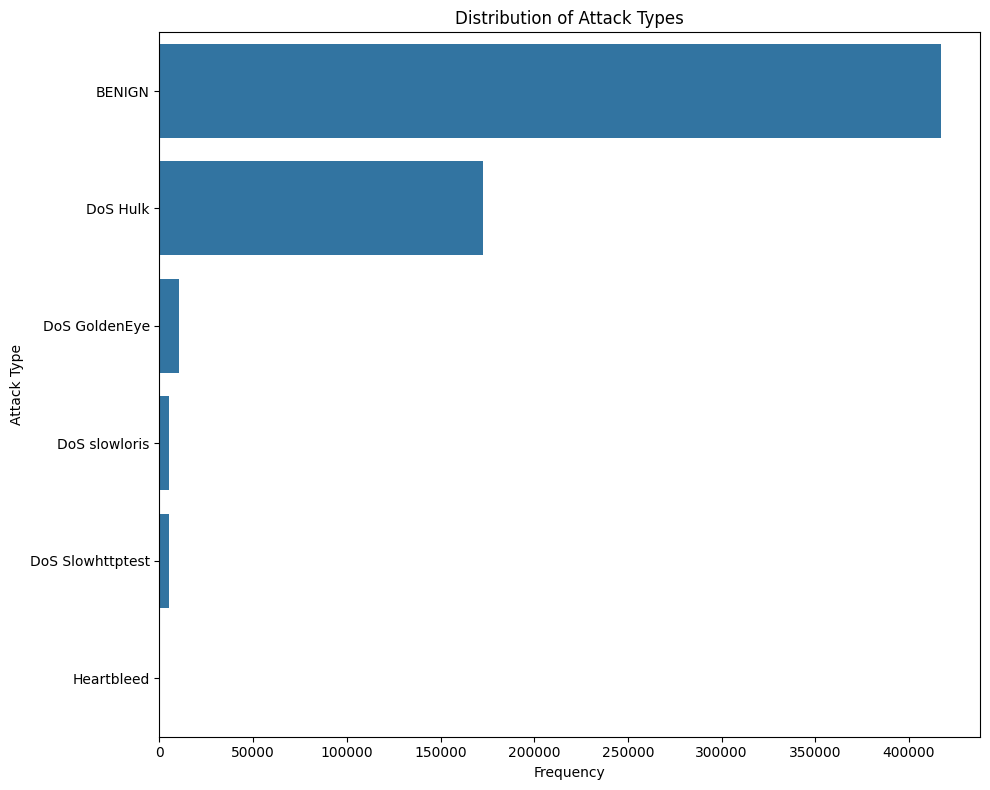

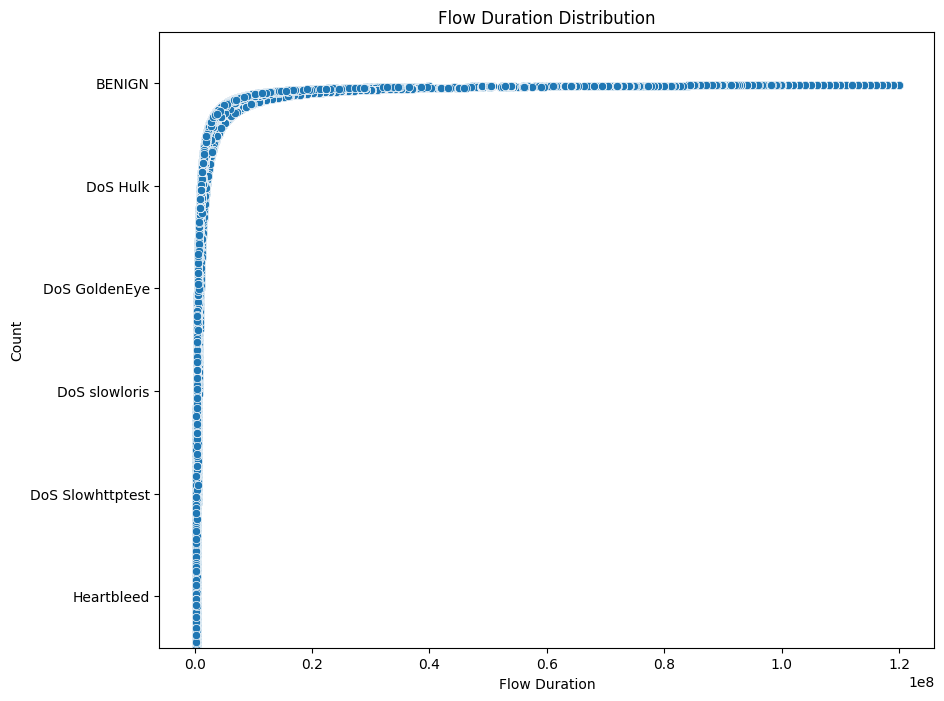

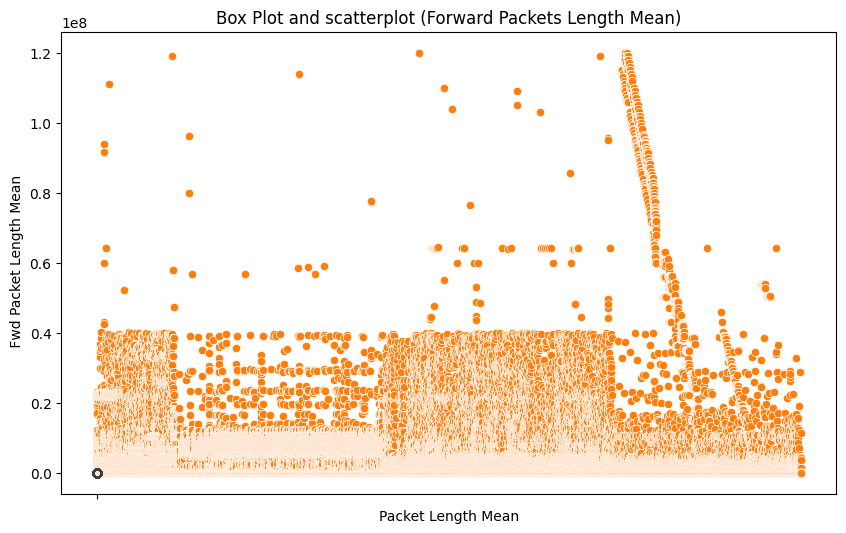

In [ ]:
attack_type_column = dataset.columns[-1]
Flow_Duration = dataset.columns[2]
Total_Fwd_Packets = dataset.columns[3]
Flow_bytes = dataset.columns[15]
Flow_pkts = dataset.columns[16]
iat_mean = dataset.columns[17]
Fwd_Pkts = dataset.columns[36]
Fwd_Pkts_Length_Mean = dataset.columns[8]

plt.figure(figsize=(10, 8))
sns.countplot(y=attack_type_column, data=dataset, order=dataset[attack_type_column].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xlabel('Frequency')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot (data=dataset, x=Flow_pkts, y=Flow_bytes)
# sns.scatterplot (dataset[Flow_Duration], data=dataset, x=Flow_pkts, y=Flow_bytes, bins=50)
sns.countplot(y=iat_mean, data=dataset, order=dataset[attack_type_column].value_counts().index)
plt.title('Flow Duration Distribution')
plt.xlabel('Flow Duration')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(dataset[Fwd_Pkts_Length_Mean])
sns.scatterplot(dataset[Flow_pkts])
plt.title('Box Plot and scatterplot (Forward Packets Length Mean)')
plt.xlabel('Packet Length Mean')
plt.show()


Text(0.5, 1.0, 'Feature Importance')

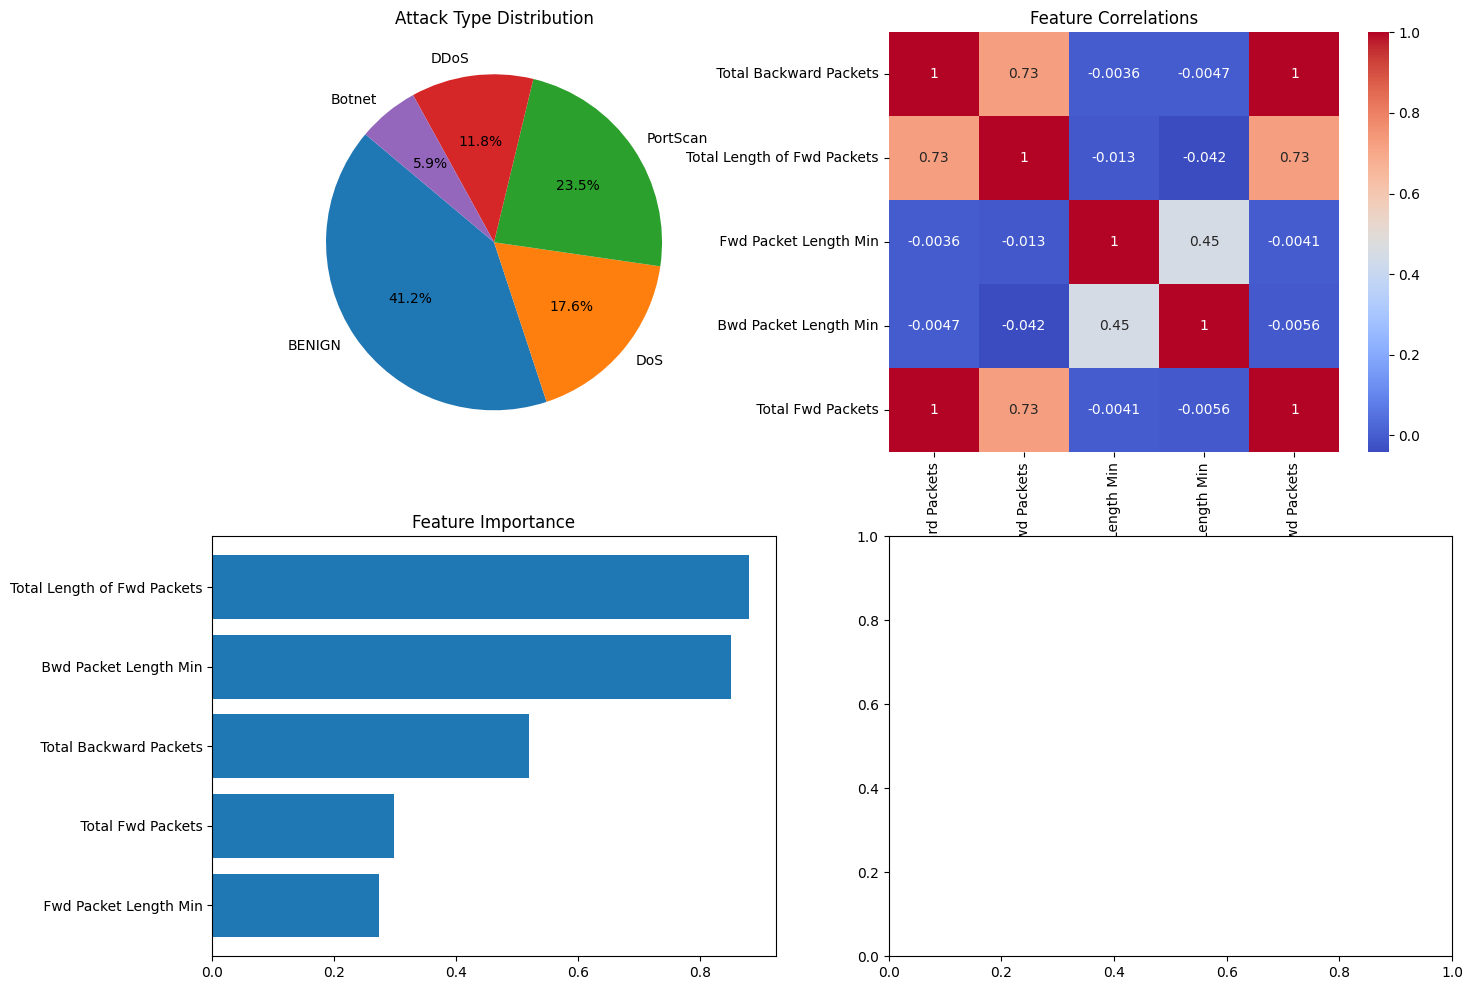

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Total_Fwd_Packets = dataset.columns[3]
Total_Bkwd_Packets = dataset.columns[4]
Fwd_Pkt_Length_Max = dataset.columns[7]
Bwd_Pkt_Length_Max = dataset.columns[11]


attack_types = ['BENIGN', 'DoS', 'PortScan', 'DDoS', 'Botnet']
attack_counts = [3500, 1500, 2000, 1000, 500]

features = [Total_Fwd_Packets, Total_Bkwd_Packets, Fwd_Pkt_Length_Max, Bwd_Pkt_Length_Max, Flow_Duration]
correlation_data = np.random.rand(5, 5)
dataset1 = pd.DataFrame(correlation_data, columns=features, index=features)
dataset_corr = dataset[features].corr()

features_importance = [Fwd_Pkt_Length_Max, Flow_Duration, Total_Fwd_Packets, Bwd_Pkt_Length_Max, Total_Bkwd_Packets]
importance_scores = np.random.rand(5)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
attack_patterns = np.random.rand(5, 4)
dataset1 = pd.DataFrame(attack_patterns, columns=attack_types[1:], index=days)

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].pie(attack_counts, labels=attack_types, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Attack Type Distribution')

sns.heatmap(dataset_corr, annot=True, cmap='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Feature Correlations')

axs[1, 0].barh(features_importance, importance_scores)
axs[1, 0].set_title('Feature Importance')



**<center><bold>MILESTONE 2</bold></center>**

**<p>Model Implementation: Develop initial models for LSTM (Long Short-Term Memory networks), RNN (Recurrent Neural Networks), and DNN (Deep Neural Networks) using a framework like TensorFlow or PyTorch.
Baseline Training: Train each model on the preprocessed dataset, ensuring to split the data into training, validation, and test sets.
Performance Evaluation: Evaluate the baseline models using metrics appropriate for classification, such as accuracy, precision, recall, and F1-score.</p>**

**<bold>Training</bold>.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models
from keras.optimizers import Adam

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

y = pd.get_dummies(dataset.iloc[:, -1]).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# lstm_model

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(y_train.shape[1], activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# RNN Model
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    SimpleRNN(50),
    Dense(y_train.shape[1], activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#DNN Model
dnn_model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[2],)),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Training
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
dnn_history = dnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[2])), y_train, validation_data=(X_val.reshape((X_val.shape[0], X_val.shape[2])), y_val), epochs=10, batch_size=64)


from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                              epochs=250, batch_size=64, callbacks=[early_stopping])

Epoch 1/10
5727/5727 [==============================] - 54s 9ms/step - loss: 0.2406 - accuracy: 0.9273 - val_loss: 0.1774 - val_accuracy: 0.9437
Epoch 2/10
5727/5727 [==============================] - 57s 10ms/step - loss: 0.1978 - accuracy: 0.9362 - val_loss: 0.1891 - val_accuracy: 0.9384
Epoch 3/10
5727/5727 [==============================] - 48s 8ms/step - loss: 0.2098 - accuracy: 0.9314 - val_loss: 0.2283 - val_accuracy: 0.9245
Epoch 4/10
5727/5727 [==============================] - 59s 10ms/step - loss: 0.1955 - accuracy: 0.9389 - val_loss: 0.1800 - val_accuracy: 0.9432
Epoch 5/10
5727/5727 [==============================] - 52s 9ms/step - loss: 0.1738 - accuracy: 0.9455 - val_loss: 0.1874 - val_accuracy: 0.9371
Epoch 6/10
5727/5727 [==============================] - 55s 10ms/step - loss: 0.1735 - accuracy: 0.9449 - val_loss: 0.1754 - val_accuracy: 0.9447
Epoch 7/10
5727/5727 [==============================] - 59s 10ms/step - loss: 0.1861 - accuracy: 0.9398 - val_loss: 0.2050 - va

In [ ]:
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

dnn_history = dnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[2])), y_train, validation_data=(X_val.reshape((X_val.shape[0], X_val.shape[2])), y_val), epochs=50, batch_size=64)


Epoch 1/50
5727/5727 [==============================] - 36s 6ms/step - loss: 0.1747 - accuracy: 0.9465 - val_loss: 0.1830 - val_accuracy: 0.9442
Epoch 2/50
5727/5727 [==============================] - 46s 8ms/step - loss: 0.1609 - accuracy: 0.9503 - val_loss: 0.1578 - val_accuracy: 0.9501
Epoch 3/50
5727/5727 [==============================] - 40s 7ms/step - loss: 0.1473 - accuracy: 0.9548 - val_loss: 0.1495 - val_accuracy: 0.9513
Epoch 4/50
5727/5727 [==============================] - 36s 6ms/step - loss: 0.1601 - accuracy: 0.9500 - val_loss: 0.1628 - val_accuracy: 0.9466
Epoch 5/50
5727/5727 [==============================] - 35s 6ms/step - loss: 0.1657 - accuracy: 0.9473 - val_loss: 0.1768 - val_accuracy: 0.9463
Epoch 6/50
5727/5727 [==============================] - 36s 6ms/step - loss: 0.1650 - accuracy: 0.9481 - val_loss: 0.1833 - val_accuracy: 0.9459
Epoch 7/50
5727/5727 [==============================] - 37s 6ms/step - loss: 0.1584 - accuracy: 0.9511 - val_loss: 0.1567 - val_ac

# **Evaluation**

# **Raising the model Accuracy**

In [ ]:
from keras import regularizers

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(y_train.shape[1], activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=64)

rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    SimpleRNN(50),
    Dense(y_train.shape[1], activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

dnn_model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[2],)),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
dnn_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

dnn_history = dnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[2])), y_train, validation_data=(X_val.reshape((X_val.shape[0], X_val.shape[2])), y_val), epochs=10, batch_size=64)

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)),
    LSTM(50, kernel_regularizer=regularizers.l2(0.01)),
    Dense(y_train.shape[1], activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    SimpleRNN(50, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/250
5727/5727 [==============================] - 47s 7ms/step - loss: 0.2420 - accuracy: 0.9259 - val_loss: 0.2001 - val_accuracy: 0.9406
Epoch 2/250
5727/5727 [==============================] - 39s 7ms/step - loss: 0.2028 - accuracy: 0.9375 - val_loss: 0.1909 - val_accuracy: 0.9386
Epoch 3/250
5727/5727 [==============================] - 39s 7ms/step - loss: 0.1901 - accuracy: 0.9394 - val_loss: 0.1951 - val_accuracy: 0.9295
Epoch 4/250
5727/5727 [==============================] - 39s 7ms/step - loss: 0.1867 - accuracy: 0.9411 - val_loss: 0.1775 - val_accuracy: 0.9429
Epoch 5/250
5727/5727 [==============================] - 40s 7ms/step - loss: 0.1873 - accuracy: 0.9391 - val_loss: 0.1918 - val_accuracy: 0.9349
Epoch 6/250
5727/5727 [==============================] - 39s 7ms/step - loss: 0.1829 - accuracy: 0.9416 - val_loss: 0.2218 - val_accuracy: 0.9341
Epoch 7/250
5727/5727 [==============================] - 42s 7ms/step - loss: 0.2056 - accuracy: 0.9326 - val_loss: 0.1927 -

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Predictions**

In [ ]:
import pickle
from google.colab import drive

lstm_model = pickle.load(open('/content/drive/MyDrive/lstm_model.pkl', 'rb'))
rnn_model = pickle.load(open('/content/drive/MyDrive/rnn_model.pkl', 'rb'))
dnn_model = pickle.load(open('/content/drive/MyDrive/dnn_model.pkl', 'rb'))

y_pred_lstm = lstm_model.predict(X_test)
y_pred_rnn = rnn_model.predict(X_test)
y_pred_dnn = dnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[2])))

with open('/content/drive/MyDrive/y_pred_lstm.pkl', 'wb') as f:
  pickle.dump(y_pred_lstm, f)

with open('/content/drive/MyDrive/y_pred_rnn.pkl', 'wb') as f:
  pickle.dump(y_pred_rnn, f)

with open('/content/drive/MyDrive/y_pred_dnn.pkl', 'wb') as f:
  pickle.dump(y_pred_dnn, f)


In [ ]:
lstm_predictions = lstm_model.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[2])))

lstm_pred_labels = np.argmax(lstm_predictions, axis=1)
rnn_pred_labels = np.argmax(rnn_predictions, axis=1)
dnn_pred_labels = np.argmax(dnn_predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

# Classification report
print("LSTM Model Classification Report:\n", classification_report(y_test_labels, lstm_pred_labels))
print("RNN Model Classification Report:\n", classification_report(y_test_labels, rnn_pred_labels))
print("DNN Model Classification Report:\n", classification_report(y_test_labels, dnn_pred_labels))


3818/3818 [==============================] - 6s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

LSTM Model Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.99      0.82     83491
           1       0.00      0.00      0.00      2061
           2       0.85      0.11      0.19     34494
           3       0.00      0.00      0.00      1024
           4       0.00      0.00      0.00      1086
           5       0.00      0.00      0.00         3

    accuracy                           0.71    122159
   macro avg       0.26      0.18      0.17    122159
weighted avg       0.72      0.71      0.62    122159

RNN Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79     83491
           1       0.00      0.00      0.00      2061
           2       0.51      0.91      0.65     34494
           3       0.00      0.00      0.00      1024
           4       0.00      0.00      0.00      1086
           5       0.00      0.00      0.00         3

    accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

DNN Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82     83491
           1       0.00      0.00      0.00      2061
           2       0.54      1.00      0.70     34494
           3       0.00      0.00      0.00      1024
           4       0.00      0.00      0.00      1086
           5       0.00      0.00      0.00         3

    accuracy                           0.76    122159
   macro avg       0.26      0.28      0.25    122159
weighted avg       0.83      0.76      0.76    122159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


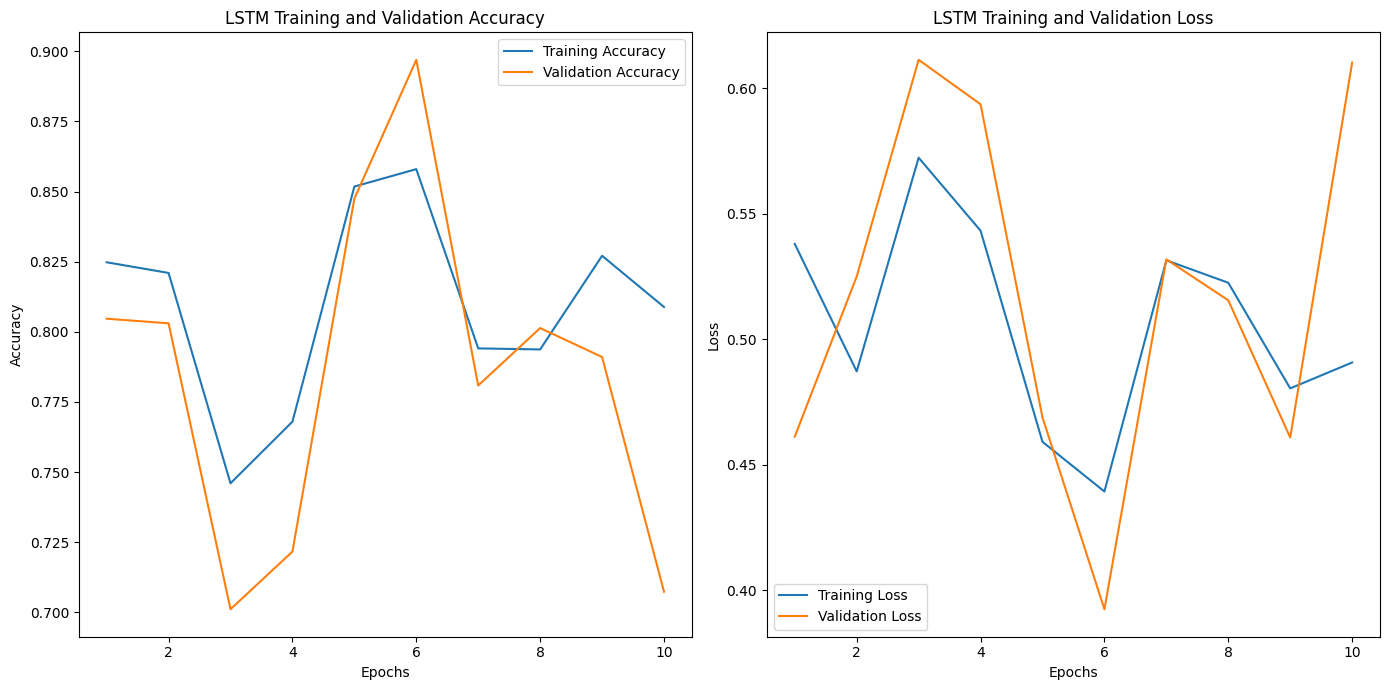

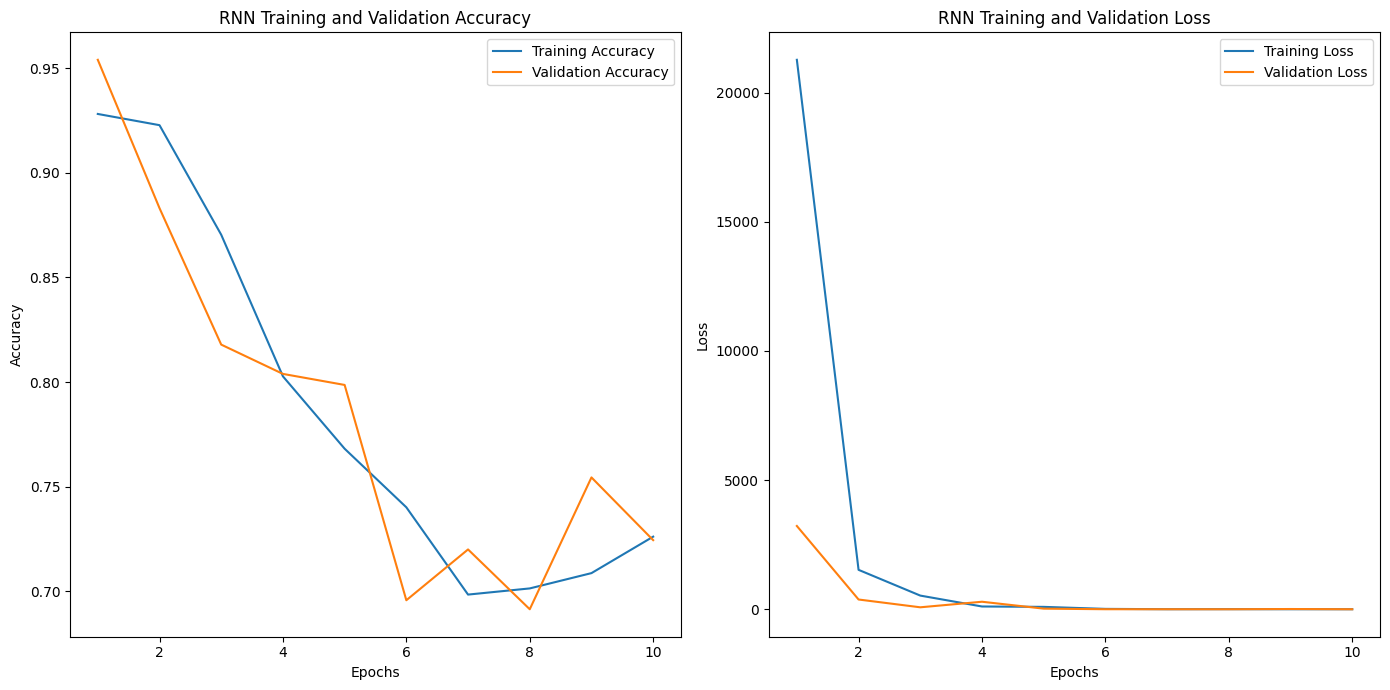

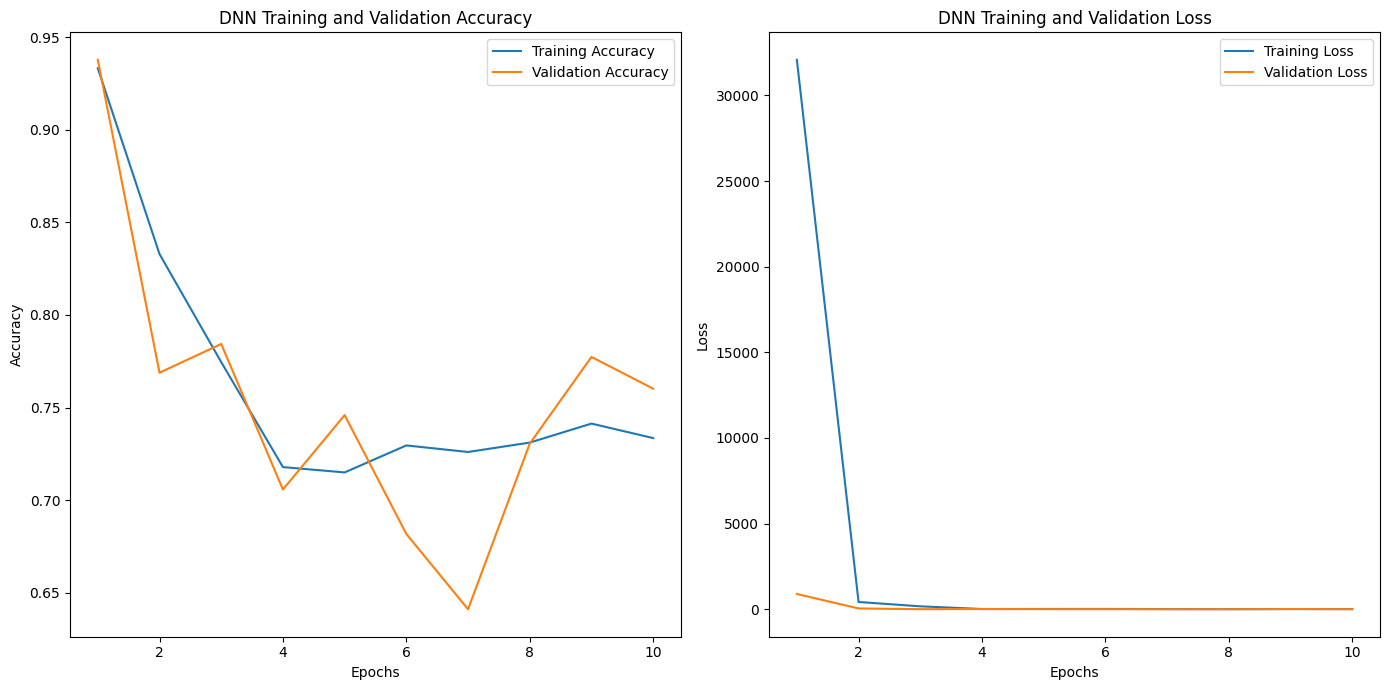

In [ ]:
import matplotlib.pyplot as plt

def plot_model_performance(history, title):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_model_performance(lstm_history, 'LSTM')
plot_model_performance(rnn_history, 'RNN')
plot_model_performance(dnn_history, 'DNN')


# Feature Importance Visualization

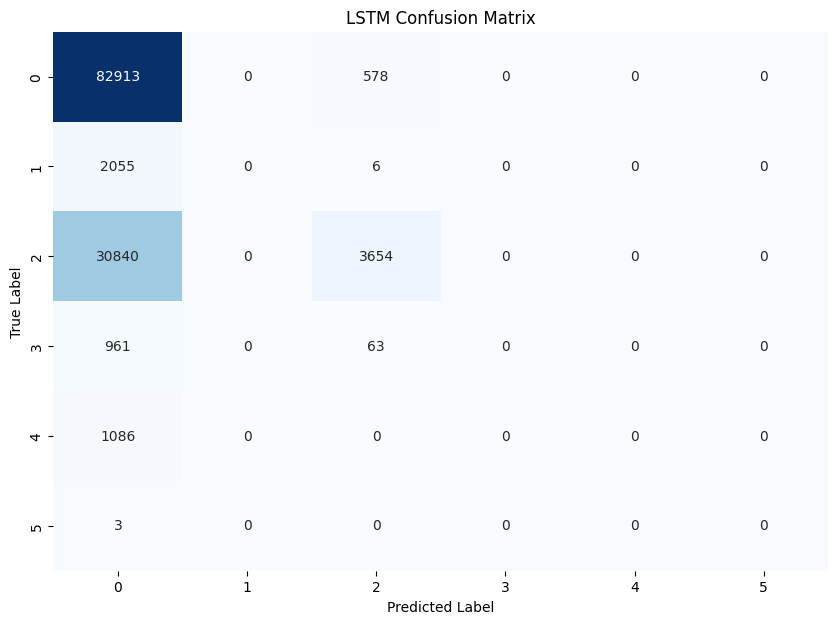

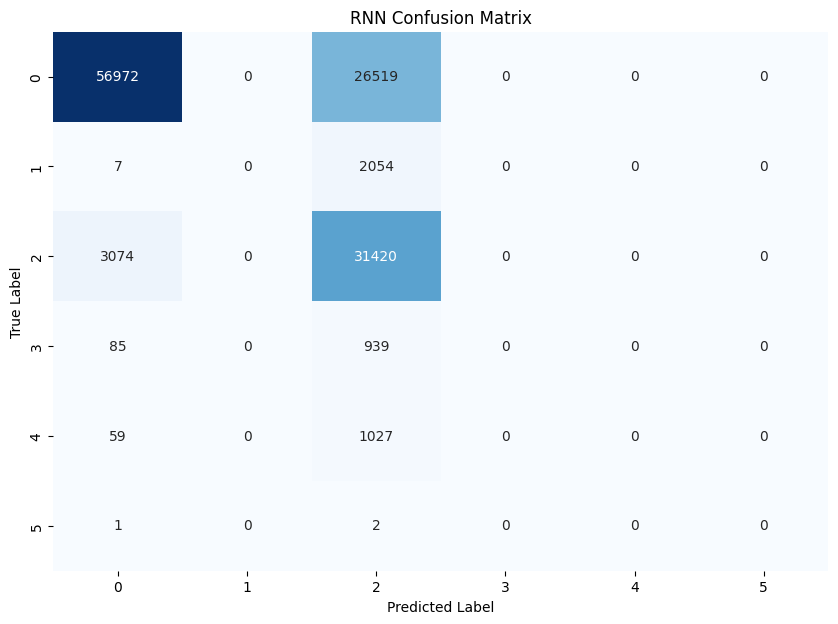

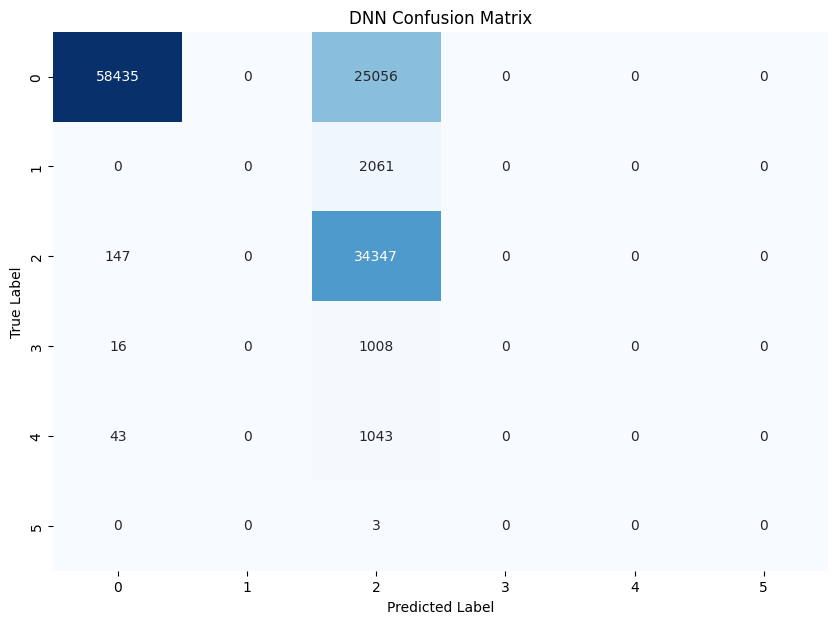

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test_labels, lstm_pred_labels, 'LSTM')
plot_confusion_matrix(y_test_labels, rnn_pred_labels, 'RNN')
plot_confusion_matrix(y_test_labels, dnn_pred_labels, 'DNN')
